In [1]:
# Importação de libraries e arquivos de etl

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/Pedro/Desktop/Agron Analytics/clustering usm novembro/08-2019-usm.csv',
                 delimiter=',')

In [4]:
df.head()

,equipamento_codigo,data_hora_apontamento,coordenada,base_cutter_pressure,chopper_pressure,hxag_paired_vehicle,hxag_speed_kph,hxag_traveled_distance
0,20246,2019-08-03 02:13:25.64,"(-20.8877493333333,-48.2062496666667)",37.35,122.0,21028.0,0.000000,18783.380859
1,20234,2019-08-03 02:13:20.488,"(-21.4497086666667,-48.2000313333333)",33.55,76.0,NaN,3.724372,102246.570312
2,20234,2019-08-03 02:13:17.981,"(-21.4497151666667,-48.2000558333333)",57.30,97.3,NaN,3.678072,102244.695312
3,20234,2019-08-03 02:13:10.805,"(-21.4497375,-48.2001336666667)",27.75,99.0,NaN,2.433528,102235.460938
4,20234,2019-08-03 02:13:09.65,"(-21.4497391666667,-48.2001376666667)",44.55,79.7,NaN,0.000000,102234.804688


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307132 entries, 0 to 1307131
Data columns (total 8 columns):
equipamento_codigo        1307132 non-null int64
data_hora_apontamento     1307132 non-null object
coordenada                1307132 non-null object
base_cutter_pressure      1306757 non-null float64
chopper_pressure          1306757 non-null float64
hxag_paired_vehicle       820373 non-null float64
hxag_speed_kph            1306757 non-null float64
hxag_traveled_distance    1306757 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 79.8+ MB


In [6]:
df.sort_values(['equipamento_codigo','data_hora_apontamento'], inplace=True)

In [7]:
df['hxag_paired_vehicle'].fillna(method='ffill', inplace=True)

In [8]:
df[df['equipamento_codigo']==20231]['hxag_paired_vehicle']

20610      20998.0
20592      20998.0
20609      20998.0
20608      20998.0
20606      20998.0
20664      20998.0
26668      20998.0
26724      20996.0
26773      20996.0
26771      20996.0
27022      20996.0
27021      20996.0
26959      20996.0
26955      20996.0
26947      20996.0
26936      20996.0
27017      20996.0
27016      20996.0
27034      20996.0
27037      20996.0
27069      20996.0
27065      20996.0
27059      20996.0
27087      20996.0
27088      20996.0
27153      20996.0
27152      20996.0
27149      20996.0
27148      20996.0
27147      20996.0
            ...   
1298050    20996.0
1298051    20996.0
1298049    20996.0
1298048    20996.0
1298047    20996.0
1298046    20996.0
1298044    20996.0
1298043    20996.0
1298042    20996.0
1298033    20996.0
1298031    20996.0
1298026    20996.0
1298024    20996.0
1298023    20996.0
1298022    20996.0
1298020    20996.0
1298017    20996.0
1298007    20996.0
1298011    20996.0
1298014    20996.0
1298013    20996.0
1298009    2

In [9]:
# data engeneering
# normalização de dados str
# equipamento
# distancia

In [10]:
#lista de equipamentos
sf=list(df['equipamento_codigo'])
equipamentos=[]
for equipamento in sf:
    if equipamento not in equipamentos:
        equipamentos.append(equipamento)
        #print(equipamentos)

In [11]:
equipamentos[:5]

[20209, 20210, 20215, 20216, 20217]

In [12]:
gps=df['coordenada'].str[1:-1].str.split(',', expand=True).astype(float)
df['latitude']=gps[0].to_frame()
df['longitude']=gps[1].to_frame()
df.head()

,equipamento_codigo,data_hora_apontamento,coordenada,base_cutter_pressure,chopper_pressure,hxag_paired_vehicle,hxag_speed_kph,hxag_traveled_distance,latitude,longitude
20895,20209,2019-08-01 00:00:17.424,"(-21.4813406666667,-47.9317483333333)",71.10,85.3,20983.0,1.950156,2128.057129,-21.481341,-47.931748
20892,20209,2019-08-01 00:01:18.325,"(-21.4814283333333,-47.9313516666667)",46.85,106.3,20983.0,2.615024,2169.480713,-21.481428,-47.931352
20891,20209,2019-08-01 00:02:18.743,"(-21.4815315,-47.93092)",61.50,98.6,20983.0,2.837264,2215.253418,-21.481531,-47.930920
20865,20209,2019-08-01 00:03:18.776,"(-21.4816546666667,-47.9305018333333)",63.25,135.8,20983.0,2.898380,2259.515869,-21.481655,-47.930502
20862,20209,2019-08-01 00:04:19.029,"(-21.4817728333333,-47.9301353333333)",71.25,73.1,20983.0,2.426120,2300.368164,-21.481773,-47.930135


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307132 entries, 20895 to 1297378
Data columns (total 10 columns):
equipamento_codigo        1307132 non-null int64
data_hora_apontamento     1307132 non-null object
coordenada                1307132 non-null object
base_cutter_pressure      1306757 non-null float64
chopper_pressure          1306757 non-null float64
hxag_paired_vehicle       1307132 non-null float64
hxag_speed_kph            1306757 non-null float64
hxag_traveled_distance    1306757 non-null float64
latitude                  1307132 non-null float64
longitude                 1307132 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 109.7+ MB


In [14]:
df['data_hora_apontamento']=df['data_hora_apontamento'].astype(str)

In [15]:
h=df['data_hora_apontamento'].str.split(" ", n=2, expand=True)
df['data']=h[0].to_frame()
df['hora']=h[1].to_frame()
#df['hora']
hr=df['hora'].str.split(".", n=2, expand=True)
df['hora_final']=hr[0].to_frame()
df['hora_final']

20895      00:00:17
20892      00:01:18
20891      00:02:18
20865      00:03:18
20862      00:04:19
20841      00:05:19
20772      00:06:19
20692      00:07:19
20652      00:08:20
20451      00:09:20
20589      00:10:20
20324      00:10:29
20555      00:10:48
20554      00:11:48
20549      00:12:48
20522      00:13:48
20507      00:14:49
20488      00:15:49
20487      00:16:49
20477      00:17:49
20466      00:18:50
20452      00:19:50
20444      00:20:50
20443      00:21:51
20437      00:21:55
20435      00:22:30
20426      00:23:30
20420      00:24:30
20379      00:25:31
20375      00:26:31
             ...   
1297587    22:55:50
1297554    22:58:45
1297557    23:00:31
1297556    23:00:51
1297553    23:00:52
1297552    23:01:06
1297551    23:02:09
1297550    23:03:03
1297549    23:03:27
1297508    23:03:46
1297506    23:05:32
1297504    23:06:42
1297444    23:06:56
1297445    23:07:50
1297439    23:10:19
1297438    23:11:00
1297437    23:11:48
1297436    23:12:49
1297433    23:13:03


In [16]:
hm=df['hora_final'].str.split(":", n=3, expand=True)
df['hm1']=hm[0].to_frame()
df['hm2']=hm[1].to_frame()
df['horario']=df['hm1']+":"+df['hm2']
df['horario']

20895      00:00
20892      00:01
20891      00:02
20865      00:03
20862      00:04
20841      00:05
20772      00:06
20692      00:07
20652      00:08
20451      00:09
20589      00:10
20324      00:10
20555      00:10
20554      00:11
20549      00:12
20522      00:13
20507      00:14
20488      00:15
20487      00:16
20477      00:17
20466      00:18
20452      00:19
20444      00:20
20443      00:21
20437      00:21
20435      00:22
20426      00:23
20420      00:24
20379      00:25
20375      00:26
           ...  
1297587    22:55
1297554    22:58
1297557    23:00
1297556    23:00
1297553    23:00
1297552    23:01
1297551    23:02
1297550    23:03
1297549    23:03
1297508    23:03
1297506    23:05
1297504    23:06
1297444    23:06
1297445    23:07
1297439    23:10
1297438    23:11
1297437    23:11
1297436    23:12
1297433    23:13
1297434    23:13
1297432    23:14
1297431    23:14
1297429    23:15
1297428    23:16
1297427    23:17
1297426    23:17
1297382    23:18
1297381    23:

In [17]:
import datetime
def make_delta(entry):
    h, m = entry.split(':')
    return datetime.timedelta(hours=int(h), minutes=int(m))
data=pd.DataFrame(df['horario'])
data.head()
data=data.applymap(lambda entry: make_delta(entry))

In [18]:
df['horario_final']=data

In [19]:
def fill_event_column(df):
    event_column_name = "event_id"
    df[event_column_name] = ""

    last_equipment_code = None
    last_paired_vehicle = None
    last_hour_final = None
    event_identifier = None
    for index, row in df.iterrows():
        equipment_code = row["equipamento_codigo"]
        paired_vehicle = row["hxag_paired_vehicle"]
        hour_final = row["horario_final"]
        date_hour_complete = row["data_hora_apontamento"]

        should_generate_identifier = should_generate_new_identifier(
            last_equipment_code,
            last_paired_vehicle,
            last_hour_final,
            equipment_code,
            paired_vehicle,
            hour_final,
        )
        if event_identifier is None or should_generate_identifier:
            event_identifier = generate_event_identifier(
                equipment_code, paired_vehicle, date_hour_complete
            )
        df.at[index, event_column_name] = event_identifier

        last_equipment_code = equipment_code
        last_paired_vehicle = paired_vehicle
        last_hour_final = hour_final


def should_generate_new_identifier(
    last_equipment_code,
    last_paired_vehicle,
    last_hour_final,
    equipment_code,
    paired_vehicle,
    hour_final,
):
    hour_delta = hour_final - last_hour_final
    return (
        last_equipment_code != equipment_code
        or last_paired_vehicle != paired_vehicle
        or hour_delta > pd.Timedelta("10 min")
    )


def generate_event_identifier(equipment_code, paired_vehicle, date_start):
    return f"{equipment_code}#{paired_vehicle}#{date_start}"


fill_event_column(df)

In [20]:
df.head()

,equipamento_codigo,data_hora_apontamento,coordenada,base_cutter_pressure,chopper_pressure,hxag_paired_vehicle,hxag_speed_kph,hxag_traveled_distance,latitude,longitude,data,hora,hora_final,hm1,hm2,horario,horario_final,event_id
20895,20209,2019-08-01 00:00:17.424,"(-21.4813406666667,-47.9317483333333)",71.10,85.3,20983.0,1.950156,2128.057129,-21.481341,-47.931748,2019-08-01,00:00:17.424,00:00:17,00,00,00:00,00:00:00,20209#20983.0#2019-08-01 00:00:17.424
20892,20209,2019-08-01 00:01:18.325,"(-21.4814283333333,-47.9313516666667)",46.85,106.3,20983.0,2.615024,2169.480713,-21.481428,-47.931352,2019-08-01,00:01:18.325,00:01:18,00,01,00:01,00:01:00,20209#20983.0#2019-08-01 00:00:17.424
20891,20209,2019-08-01 00:02:18.743,"(-21.4815315,-47.93092)",61.50,98.6,20983.0,2.837264,2215.253418,-21.481531,-47.930920,2019-08-01,00:02:18.743,00:02:18,00,02,00:02,00:02:00,20209#20983.0#2019-08-01 00:00:17.424
20865,20209,2019-08-01 00:03:18.776,"(-21.4816546666667,-47.9305018333333)",63.25,135.8,20983.0,2.898380,2259.515869,-21.481655,-47.930502,2019-08-01,00:03:18.776,00:03:18,00,03,00:03,00:03:00,20209#20983.0#2019-08-01 00:00:17.424
20862,20209,2019-08-01 00:04:19.029,"(-21.4817728333333,-47.9301353333333)",71.25,73.1,20983.0,2.426120,2300.368164,-21.481773,-47.930135,2019-08-01,00:04:19.029,00:04:19,00,04,00:04,00:04:00,20209#20983.0#2019-08-01 00:00:17.424


In [21]:
# criação de dataset para clustering
# distancia final --> distancia percorrida
# drop coluna inúteis
# indexar event_id

In [22]:
# para fazer o delta distance
df['dist_final']=df['hxag_traveled_distance']

In [23]:
dataset=df[['event_id','dist_final','hxag_traveled_distance','base_cutter_pressure',
            'latitude','longitude','hxag_speed_kph']]

In [24]:
set_map=dataset
set_map.head(2)

,event_id,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph
20895,20209#20983.0#2019-08-01 00:00:17.424,2128.057129,2128.057129,71.10,-21.481341,-47.931748,1.950156
20892,20209#20983.0#2019-08-01 00:00:17.424,2169.480713,2169.480713,46.85,-21.481428,-47.931352,2.615024


In [25]:
dataset.head(5)

,event_id,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph
20895,20209#20983.0#2019-08-01 00:00:17.424,2128.057129,2128.057129,71.10,-21.481341,-47.931748,1.950156
20892,20209#20983.0#2019-08-01 00:00:17.424,2169.480713,2169.480713,46.85,-21.481428,-47.931352,2.615024
20891,20209#20983.0#2019-08-01 00:00:17.424,2215.253418,2215.253418,61.50,-21.481531,-47.930920,2.837264
20865,20209#20983.0#2019-08-01 00:00:17.424,2259.515869,2259.515869,63.25,-21.481655,-47.930502,2.898380
20862,20209#20983.0#2019-08-01 00:00:17.424,2300.368164,2300.368164,71.25,-21.481773,-47.930135,2.426120


In [26]:
group_event=pd.DataFrame(dataset.groupby('event_id').agg({'dist_final': np.max,'hxag_traveled_distance': np.min,
                                                                'base_cutter_pressure': np.median,
                                                          'latitude': np.median,
                                                          'longitude': np.median,
                                                          'hxag_speed_kph': np.median}))
group_event.head(10)

,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph
event_id,,,,,,
20209#20978.0#2019-08-01 03:03:56.614,9760.725586,9293.168945,64.125,-21.485121,-47.924910,2.543722
20209#20978.0#2019-08-01 03:41:21.662,11465.261719,10986.043945,77.250,-21.484358,-47.925925,2.848376
20209#20978.0#2019-08-01 04:03:50.113,12409.104492,11894.295898,59.950,-21.486803,-47.922973,2.811336
20209#20978.0#2019-08-01 06:48:36.633,19662.517578,18853.945312,77.250,-21.481903,-47.930697,3.239148
20209#20978.0#2019-08-01 08:16:01.106,23350.716797,23287.441406,63.250,-21.487415,-47.921588,2.928012
20209#20978.0#2019-08-01 08:34:08.113,23431.445312,23431.445312,2.000,-21.486996,-47.921025,0.000000
20209#20978.0#2019-08-01 08:46:53.049,23500.230469,23492.556641,64.975,-21.487330,-47.920801,3.137288
20209#20978.0#2019-08-02 03:22:10.169,1427.297485,777.269775,60.550,-21.485836,-47.943403,3.537320
20209#20978.0#2019-08-02 04:06:25.147,3229.515625,2462.180664,64.550,-21.488144,-47.934345,2.681696


In [27]:
group_event['dist_perc']=group_event['dist_final']-group_event['hxag_traveled_distance']

In [28]:
# dicionário de pressão em velocidade entre 2.5 e 3.5 km/h

In [29]:
pressao_3=df[(df['hxag_speed_kph']>2.5) & (df['hxag_speed_kph']>3.5)][['event_id','base_cutter_pressure']]

In [30]:
pressao_3.head()

,event_id,base_cutter_pressure
20555,20209#20983.0#2019-08-01 00:00:17.424,42.55
20038,20209#21051.0#2019-08-01 00:31:26.199,51.30
20056,20209#21051.0#2019-08-01 00:31:26.199,60.30
20055,20209#21051.0#2019-08-01 00:31:26.199,68.10
19834,20209#20983.0#2019-08-01 00:41:20.433,43.10


In [31]:
pressao_3=pd.DataFrame(pressao_3.groupby('event_id').agg({'base_cutter_pressure': np.median}))
pressao_3.head()

,base_cutter_pressure
event_id,
20209#20978.0#2019-08-01 03:41:21.662,87.100
20209#20978.0#2019-08-01 04:03:50.113,74.775
20209#20978.0#2019-08-01 06:48:36.633,62.350
20209#20978.0#2019-08-01 08:46:53.049,81.575
20209#20978.0#2019-08-02 03:22:10.169,62.350


In [32]:
pressao_3.columns = ['pressao']

In [33]:
dataset_consolidado=pd.concat([group_event,pressao_3],axis=1,sort=False)
dataset_consolidado

,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph,dist_perc,pressao
20209#20978.0#2019-08-01 03:03:56.614,9760.725586,9293.168945,64.125,-21.485121,-47.924910,2.543722,467.556641,NaN
20209#20978.0#2019-08-01 03:41:21.662,11465.261719,10986.043945,77.250,-21.484358,-47.925925,2.848376,479.217773,87.100
20209#20978.0#2019-08-01 04:03:50.113,12409.104492,11894.295898,59.950,-21.486803,-47.922973,2.811336,514.808594,74.775
20209#20978.0#2019-08-01 06:48:36.633,19662.517578,18853.945312,77.250,-21.481903,-47.930697,3.239148,808.572266,62.350
20209#20978.0#2019-08-01 08:16:01.106,23350.716797,23287.441406,63.250,-21.487415,-47.921588,2.928012,63.275391,NaN
20209#20978.0#2019-08-01 08:34:08.113,23431.445312,23431.445312,2.000,-21.486996,-47.921025,0.000000,0.000000,NaN
20209#20978.0#2019-08-01 08:46:53.049,23500.230469,23492.556641,64.975,-21.487330,-47.920801,3.137288,7.673828,81.575
20209#20978.0#2019-08-02 03:22:10.169,1427.297485,777.269775,60.550,-21.485836,-47.943403,3.537320,650.027710,62.350
20209#20978.0#2019-08-02 04:06:25.147,3229.515625,2462.180664,64.550,-21.488144,-47.934345,2.681696,767.334961,59.050
20209#20978.0#2019-08-02 04:43:13.159,4615.407715,3989.923584,62.600,-21.485032,-47.947744,3.162290,625.484131,67.600


In [34]:
dataset_consolidado['pressao'].isnull().sum()

2362

In [35]:
dataset_consolidado.dropna(inplace=True)

In [36]:
dataset_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46839 entries, 20209#20978.0#2019-08-01 03:41:21.662 to 20275#21020.0#2019-08-01 00:01:58.115
Data columns (total 8 columns):
dist_final                46839 non-null float64
hxag_traveled_distance    46839 non-null float64
base_cutter_pressure      46839 non-null float64
latitude                  46839 non-null float64
longitude                 46839 non-null float64
hxag_speed_kph            46839 non-null float64
dist_perc                 46839 non-null float64
pressao                   46839 non-null float64
dtypes: float64(8)
memory usage: 3.2+ MB


In [37]:
dataset_consolidado['fator']=133333

In [38]:
dataset_consolidado['tch']=dataset_consolidado['fator']/dataset_consolidado['dist_perc']

In [39]:
dataset_consolidado.describe()

,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph,dist_perc,pressao,fator,tch
count,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,46839.0,4.683900e+04
mean,46010.426282,43949.699047,56.471292,-21.351896,-48.092683,4.849621,2060.727236,54.232108,133333.0,inf
std,51344.632502,51291.764721,164.407016,0.162044,0.193677,1.415771,7241.963365,121.053631,0.0,NaN
min,2.068150,0.000000,0.000000,-21.622142,-48.520795,0.000000,0.000000,0.000000,133333.0,3.871300e-01
25%,11660.833008,9547.831543,41.775000,-21.464973,-48.198462,3.828084,782.065918,42.825000,133333.0,6.925961e+01
50%,28858.582031,26765.261719,46.725000,-21.385814,-48.095714,4.959656,1362.668945,48.100000,133333.0,9.784695e+01
75%,60120.408203,58109.121094,52.750000,-21.274959,-47.973893,5.939364,1925.119141,54.750000,133333.0,1.704882e+02
max,364773.437500,364135.125000,3251.200000,-11.573670,-26.622181,28.205033,344413.999229,3251.200000,133333.0,inf


In [40]:
dataset_consolidado=dataset_consolidado[(dataset_consolidado['tch']<120) & (dataset_consolidado['tch']>35) & (dataset_consolidado['pressao']<100)]

In [41]:
dataset_consolidado

,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph,dist_perc,pressao,fator,tch
20209#20978.0#2019-08-06 05:20:03.508,7048.942871,5709.704102,54.650,-21.512170,-48.003515,4.700376,1339.238770,56.100,133333,99.558796
20209#20978.0#2019-08-06 05:52:18.345,9362.972656,7873.876465,60.650,-21.512753,-48.003405,4.981880,1489.096191,60.650,133333,89.539548
20209#20978.0#2019-08-06 13:42:02.86,34904.726562,33668.941406,55.125,-21.513848,-47.997161,4.735564,1235.785156,55.150,133333,107.893350
20209#20978.0#2019-08-06 18:31:51.1,8356.763672,6876.362305,53.850,-21.519475,-48.009596,2.592800,1480.401367,65.925,133333,90.065440
20209#20978.0#2019-08-07 00:44:29.884,2854.669434,1278.493164,54.150,-21.520517,-48.009560,4.183668,1576.176270,55.350,133333,84.592696
20209#20978.0#2019-08-07 19:20:40.097,20653.238281,19089.667969,50.500,-21.510401,-48.008101,4.048472,1563.570312,51.250,133333,85.274707
20209#20978.0#2019-08-08 04:59:46.64,3814.678711,2192.366943,57.350,-21.505676,-48.007356,3.033576,1622.311768,55.550,133333,82.187039
20209#20978.0#2019-08-08 13:36:08.637,3428.044434,1212.965698,44.000,-21.518801,-48.011662,5.159672,2215.078735,46.000,133333,60.193346
20209#20978.0#2019-08-09 15:02:40.607,80373.539062,78969.250000,48.075,-21.517990,-48.008438,3.921610,1404.289062,49.975,133333,94.946976
20209#20978.0#2019-08-09 23:36:04.822,26832.330078,23674.126953,59.350,-21.507970,-47.995866,4.694820,3158.203125,60.500,133333,42.217994


In [42]:
dataset_clustering=dataset_consolidado[['tch','pressao']]

In [43]:
dataset_clustering.describe()

,tch,pressao
count,26393.000000,26393.000000
mean,77.686092,48.260678
std,20.219100,7.986692
min,35.010550,0.000000
25%,62.823066,42.800000
50%,76.147793,47.300000
75%,92.574155,52.700000
max,119.994931,97.050000


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

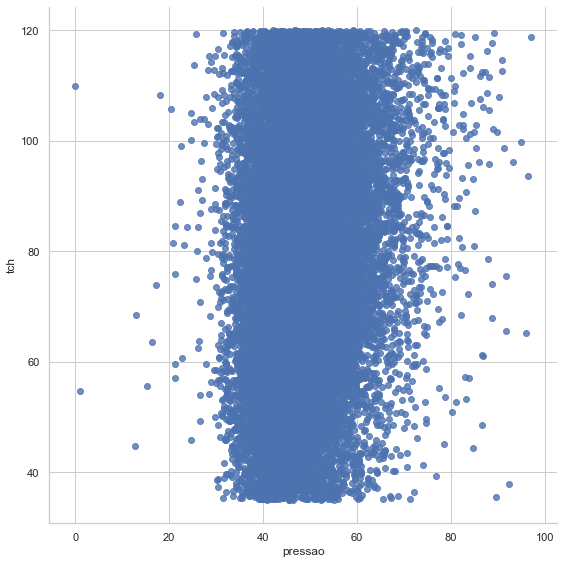

In [122]:
sns.set_style('whitegrid')
sns.lmplot('pressao','tch',data=dataset_clustering,
           palette='coolwarm',height=8,aspect=1,fit_reg=False)

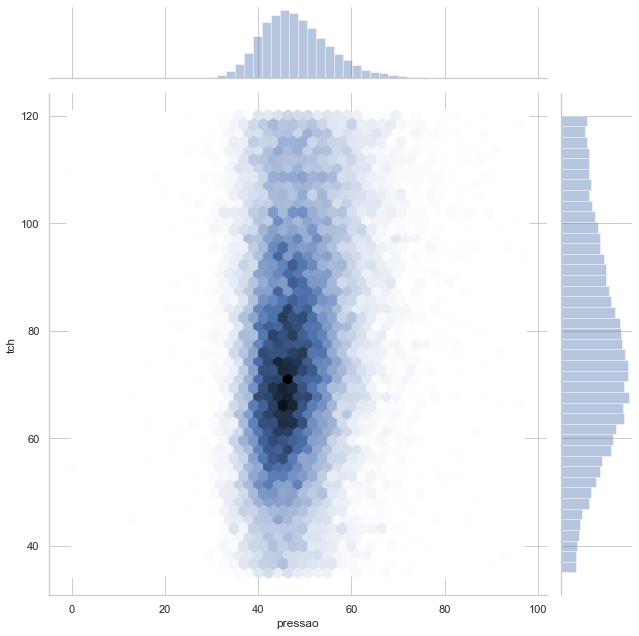

In [124]:
sns.jointplot(y='tch',x='pressao',data=dataset_clustering,kind='hex',height=9, ratio=6)

In [47]:
from sklearn.cluster import KMeans

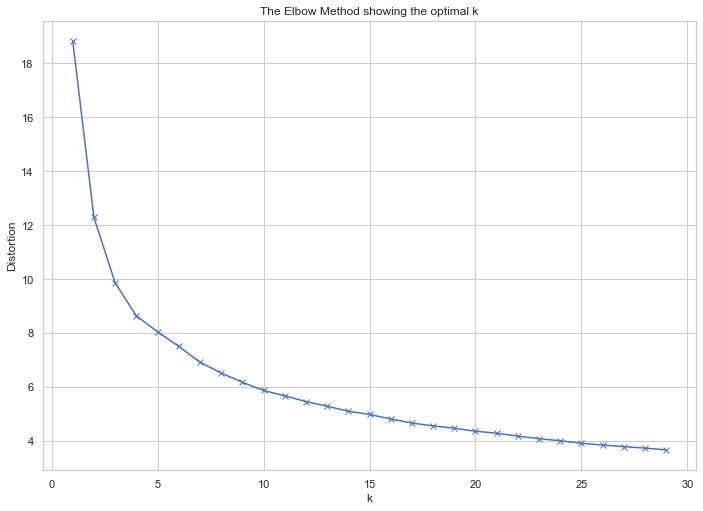

In [48]:
from sklearn import metrics
from scipy.spatial.distance import cdist




# create new plot and data
plt.plot()
X = dataset_clustering
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=7)

In [50]:
kmeans.fit(dataset_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
kmeans.cluster_centers_

array([[ 76.28870743,  43.7875975 ],
       [104.47815603,  62.17344511],
       [ 91.64366467,  47.25326986],
       [ 46.37896129,  46.45767438],
       [ 75.49045001,  57.7472664 ],
       [ 61.95027966,  45.71066271],
       [110.41026228,  45.82476852]])

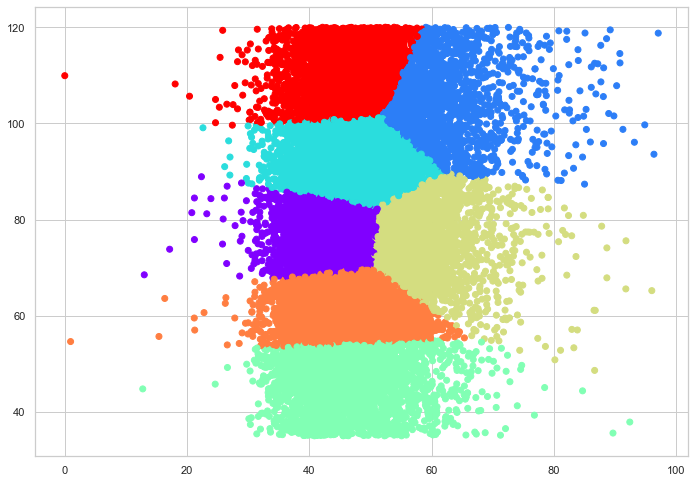

In [52]:
plt.scatter(dataset_clustering['pressao'],dataset_clustering['tch'],c=kmeans.labels_,cmap='rainbow')

In [53]:
dataset_consolidado['Cluster'] = kmeans.labels_
dataset_consolidado

C:\Users\Pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph,dist_perc,pressao,fator,tch,Cluster
20209#20978.0#2019-08-06 05:20:03.508,7048.942871,5709.704102,54.650,-21.512170,-48.003515,4.700376,1339.238770,56.100,133333,99.558796,1
20209#20978.0#2019-08-06 05:52:18.345,9362.972656,7873.876465,60.650,-21.512753,-48.003405,4.981880,1489.096191,60.650,133333,89.539548,2
20209#20978.0#2019-08-06 13:42:02.86,34904.726562,33668.941406,55.125,-21.513848,-47.997161,4.735564,1235.785156,55.150,133333,107.893350,1
20209#20978.0#2019-08-06 18:31:51.1,8356.763672,6876.362305,53.850,-21.519475,-48.009596,2.592800,1480.401367,65.925,133333,90.065440,1
20209#20978.0#2019-08-07 00:44:29.884,2854.669434,1278.493164,54.150,-21.520517,-48.009560,4.183668,1576.176270,55.350,133333,84.592696,4
20209#20978.0#2019-08-07 19:20:40.097,20653.238281,19089.667969,50.500,-21.510401,-48.008101,4.048472,1563.570312,51.250,133333,85.274707,2
20209#20978.0#2019-08-08 04:59:46.64,3814.678711,2192.366943,57.350,-21.505676,-48.007356,3.033576,1622.311768,55.550,133333,82.187039,4
20209#20978.0#2019-08-08 13:36:08.637,3428.044434,1212.965698,44.000,-21.518801,-48.011662,5.159672,2215.078735,46.000,133333,60.193346,5
20209#20978.0#2019-08-09 15:02:40.607,80373.539062,78969.250000,48.075,-21.517990,-48.008438,3.921610,1404.289062,49.975,133333,94.946976,2
20209#20978.0#2019-08-09 23:36:04.822,26832.330078,23674.126953,59.350,-21.507970,-47.995866,4.694820,3158.203125,60.500,133333,42.217994,3


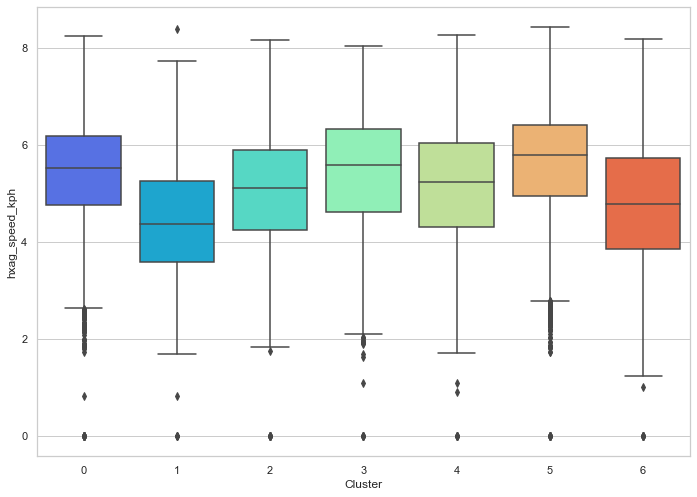

In [54]:
sns.boxplot(x='Cluster',y='hxag_speed_kph',data=dataset_consolidado,palette='rainbow',fliersize=5)

In [55]:
velocidade_cluster0=dataset_consolidado[(dataset_consolidado['Cluster']==0)]

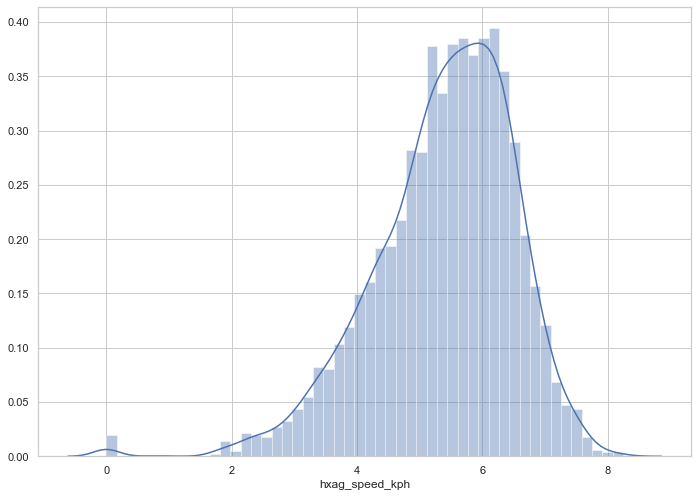

In [56]:
sns.distplot(velocidade_cluster0['hxag_speed_kph'])

In [57]:
#dicionario de cluster x velocidade ideal

In [58]:
list_clusters=kmeans.labels_

In [59]:
#lista de clusters
ls_clusters=[]
for cluster in list_clusters:
    if cluster not in ls_clusters:
        ls_clusters.append(cluster)
        #print(equipamentos)

In [60]:
#velocidade ideal em cda Cluster
veloc_cluster = {}
for vel in ls_clusters:
    _vel=pd.DataFrame(dataset_consolidado[dataset_consolidado['Cluster']==vel][['hxag_speed_kph']])
    _vel=_vel['hxag_speed_kph'].mean()
    veloc_cluster[vel]=_vel
    #print(_vel)

In [61]:
veloc_cluster

{1: 4.414022139889792,
 2: 5.028431715683033,
 4: 5.115491241376642,
 5: 5.600005376081736,
 3: 5.406308340671897,
 6: 4.774289853437889,
 0: 5.389598325763173}

In [62]:
#lista de eventos
ls_events=[]
for cluster in list_clusters:
    if cluster not in ls_clusters:
        ls_clusters.append(cluster)
        #print(equipamentos)

In [63]:
set_map.head(2)

,event_id,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph
20895,20209#20983.0#2019-08-01 00:00:17.424,2128.057129,2128.057129,71.10,-21.481341,-47.931748,1.950156
20892,20209#20983.0#2019-08-01 00:00:17.424,2169.480713,2169.480713,46.85,-21.481428,-47.931352,2.615024


In [64]:
#set_map = set_map.set_index('event_id')

In [65]:
set_map.head()

,event_id,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph
20895,20209#20983.0#2019-08-01 00:00:17.424,2128.057129,2128.057129,71.10,-21.481341,-47.931748,1.950156
20892,20209#20983.0#2019-08-01 00:00:17.424,2169.480713,2169.480713,46.85,-21.481428,-47.931352,2.615024
20891,20209#20983.0#2019-08-01 00:00:17.424,2215.253418,2215.253418,61.50,-21.481531,-47.930920,2.837264
20865,20209#20983.0#2019-08-01 00:00:17.424,2259.515869,2259.515869,63.25,-21.481655,-47.930502,2.898380
20862,20209#20983.0#2019-08-01 00:00:17.424,2300.368164,2300.368164,71.25,-21.481773,-47.930135,2.426120


In [66]:
dict_tch = dict(dataset_consolidado['tch'])

In [67]:
dict_dificuldade = dict(dataset_consolidado['pressao'])

In [68]:
dict_cluster = dict(dataset_consolidado['Cluster'])

In [69]:
pd.options.mode.chained_assignment = None  # default='warn'
set_map['tch'] = set_map['event_id'].map(dict_tch)

In [70]:
set_map['dificuldade'] = set_map['event_id'].map(dict_dificuldade)

In [71]:
set_map['cluster'] = set_map['event_id'].map(dict_cluster)

In [72]:
set_map.head()

,event_id,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph,tch,dificuldade,cluster
20895,20209#20983.0#2019-08-01 00:00:17.424,2128.057129,2128.057129,71.10,-21.481341,-47.931748,1.950156,NaN,NaN,NaN
20892,20209#20983.0#2019-08-01 00:00:17.424,2169.480713,2169.480713,46.85,-21.481428,-47.931352,2.615024,NaN,NaN,NaN
20891,20209#20983.0#2019-08-01 00:00:17.424,2215.253418,2215.253418,61.50,-21.481531,-47.930920,2.837264,NaN,NaN,NaN
20865,20209#20983.0#2019-08-01 00:00:17.424,2259.515869,2259.515869,63.25,-21.481655,-47.930502,2.898380,NaN,NaN,NaN
20862,20209#20983.0#2019-08-01 00:00:17.424,2300.368164,2300.368164,71.25,-21.481773,-47.930135,2.426120,NaN,NaN,NaN


In [73]:
set_map.dropna(inplace=True)

In [74]:
set_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884031 entries, 35115 to 1297437
Data columns (total 10 columns):
event_id                  884031 non-null object
dist_final                884031 non-null float64
hxag_traveled_distance    884031 non-null float64
base_cutter_pressure      884031 non-null float64
latitude                  884031 non-null float64
longitude                 884031 non-null float64
hxag_speed_kph            884031 non-null float64
tch                       884031 non-null float64
dificuldade               884031 non-null float64
cluster                   884031 non-null float64
dtypes: float64(9), object(1)
memory usage: 74.2+ MB


In [75]:
set_map['veloc_cluster'] = set_map['cluster'].map(veloc_cluster)

In [76]:
set_map['delta_veloc'] = set_map['veloc_cluster'] - set_map['hxag_speed_kph']

In [77]:
set_map.head()

,event_id,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph,tch,dificuldade,cluster,veloc_cluster,delta_veloc
35115,20209#20984.0#2019-08-01 12:36:01.129,34969.546875,34969.546875,73.60,-21.487580,-47.920947,4.198484,86.936003,73.6,4.0,5.115491,0.917007
35136,20209#20984.0#2019-08-01 12:36:01.129,35038.613281,35038.613281,96.50,-21.487539,-47.920669,1.822368,86.936003,73.6,4.0,5.115491,3.293123
35134,20209#20984.0#2019-08-01 12:36:01.129,35039.757812,35039.757812,90.00,-21.487542,-47.920687,0.000000,86.936003,73.6,4.0,5.115491,5.115491
35202,20209#20984.0#2019-08-01 12:36:01.129,35066.257812,35066.257812,43.75,-21.487558,-47.920718,0.000000,86.936003,73.6,4.0,5.115491,5.115491
35201,20209#20984.0#2019-08-01 12:36:01.129,35076.421875,35076.421875,77.35,-21.487575,-47.920814,4.176260,86.936003,73.6,4.0,5.115491,0.939231


In [126]:
#set_map.to_csv('set_map_index',index=True)

In [79]:
from plotly import graph_objs as go

In [80]:
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import io
import seaborn as sns
%matplotlib inline
import os

In [81]:
scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

fig = go.Figure(data=go.Scattergeo(
    lat = set_map['latitude'],
    lon = set_map['longitude'],
    text = set_map['tch'].astype(str) + ' t/ha',
    marker = dict(
        color = set_map['tch'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 10,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 1
        )
    )
))

fig.update_layout(
    geo = dict(
        scope = 'south america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -47.0, -48.2 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ -21.0, -22.0 ],
            dtick = 5
        )
    ),
    title='Mapa de TCH - USM',
)
fig.write_image("teste_map.png")

PlotlyDictValueError: 'data' has invalid value inside 'figure'

Path To Error: ['data']

Current path: []
Current parent object_names: []

Additionally:

    role: object



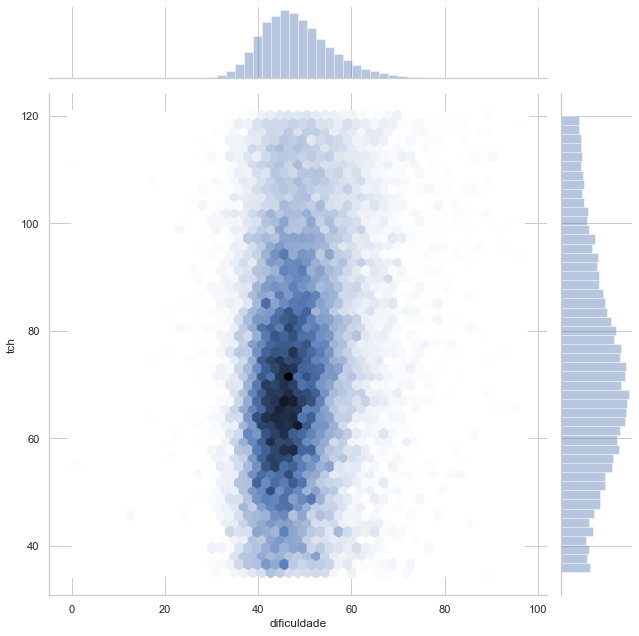

In [123]:
sns.jointplot(y='tch',x='dificuldade',data=set_map,kind='hex',height=9, ratio=6)
#plt.ylim(30, 80)

In [127]:
sequence=df['data_hora_apontamento'].astype(str)

In [129]:
sequence_consolidado=pd.concat([sequence,set_map],axis=1,sort=False)
sequence_consolidado.dropna(inplace=True)

In [131]:
sequence_consolidado.head(5)

,data_hora_apontamento,event_id,dist_final,hxag_traveled_distance,base_cutter_pressure,latitude,longitude,hxag_speed_kph,tch,dificuldade,cluster,veloc_cluster,delta_veloc
1,2019-08-03 02:13:20.488,20234#20960.0#2019-08-03 02:05:16.093,102246.570312,102246.570312,33.55,-21.449709,-48.200031,3.724372,71.357414,54.3,4.0,5.115491,1.391119
2,2019-08-03 02:13:17.981,20234#20960.0#2019-08-03 02:05:16.093,102244.695312,102244.695312,57.30,-21.449715,-48.200056,3.678072,71.357414,54.3,4.0,5.115491,1.437419
3,2019-08-03 02:13:10.805,20234#20960.0#2019-08-03 02:05:16.093,102235.460938,102235.460938,27.75,-21.449738,-48.200134,2.433528,71.357414,54.3,4.0,5.115491,2.681963
4,2019-08-03 02:13:09.65,20234#20960.0#2019-08-03 02:05:16.093,102234.804688,102234.804688,44.55,-21.449739,-48.200138,0.000000,71.357414,54.3,4.0,5.115491,5.115491
5,2019-08-03 02:13:30.666,20229#21024.0#2019-08-03 02:04:41.647,37897.515625,37897.515625,49.85,-21.325841,-48.173638,5.807872,83.555477,45.3,0.0,5.389598,-0.418274


In [132]:
sequence_consolidado.to_csv('sequence.csv',index=False)